# DOH EPI Dengue Data 2016-2021 Exploratory Data Analysis (EDA) and Visualization

Create a virtual environment then select the Python version you'll be using.
In my case I used Python 3.12.4

For the Jupyter Notebook, select the .venv(Python #). Otherwise all installed libraries won't be recognized

## Import Necessary Libraries

In [73]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Dataset and Check Overview

In [74]:
df = pd.read_csv('doh-epi-dengue-data-2016-2021.csv')

### Get basic information on the dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   loc     32702 non-null  object
 1   cases   32702 non-null  object
 2   deaths  32701 non-null  object
 3   date    32702 non-null  object
 4   Region  32702 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


The dataset contains **32702** rows/datapoints. 

Each column is a pandas object. These should converted into viable datatypes for manipulation and analysis

'deaths' column non-null count does not match the total entries of the dataset. Perform further analysis on that.

Both cities and province are mixed in the 'loc' column which may cause confusion.

In [76]:
df.head(10)

,loc,cases,deaths,date,Region
0,#adm2+name,#affected+infected,#affected+killed,#date,#region
1,ALBAY,15,0,1/10/2016,REGION V-BICOL REGION
2,ALBAY,13,0,1/17/2016,REGION V-BICOL REGION
3,ALBAY,9,0,1/24/2016,REGION V-BICOL REGION
4,ALBAY,14,0,1/31/2016,REGION V-BICOL REGION
5,ALBAY,9,0,2/7/2016,REGION V-BICOL REGION
6,ALBAY,17,0,2/14/2016,REGION V-BICOL REGION
7,ALBAY,3,0,2/21/2016,REGION V-BICOL REGION
8,ALBAY,11,0,2/28/2016,REGION V-BICOL REGION
9,ALBAY,8,0,3/6/2016,REGION V-BICOL REGION


Outputs an unnecessary 1st row which should be dropped as it may affected results.

In [77]:
# Drops index 0 (1st row) and applies it to the original dataframe (inplace=True)
df.drop(0, inplace=True)

# Check if the 1st row has been successfully dropped
df.head(10) 

,loc,cases,deaths,date,Region
1,ALBAY,15,0,1/10/2016,REGION V-BICOL REGION
2,ALBAY,13,0,1/17/2016,REGION V-BICOL REGION
3,ALBAY,9,0,1/24/2016,REGION V-BICOL REGION
4,ALBAY,14,0,1/31/2016,REGION V-BICOL REGION
5,ALBAY,9,0,2/7/2016,REGION V-BICOL REGION
6,ALBAY,17,0,2/14/2016,REGION V-BICOL REGION
7,ALBAY,3,0,2/21/2016,REGION V-BICOL REGION
8,ALBAY,11,0,2/28/2016,REGION V-BICOL REGION
9,ALBAY,8,0,3/6/2016,REGION V-BICOL REGION
10,ALBAY,6,0,3/13/2016,REGION V-BICOL REGION


## Check for Null values

In [78]:
# View whether there are any missing values in the dataset

# df[] initiates a view of the dataframe
# df.isnull() creates a df copy of boolean values whether a cell is Null
# .any(axis=1) returns a row (axis=1) where an element is true

df[df.isnull().any(axis=1)]

,loc,cases,deaths,date,Region
12775,QUEZON CITY,48,NaN,5/7/2017,NATIONAL CAPITAL REGION


The returned data **only has one null feature**. We can impute a statistical measure instead of dropping it.

In [96]:
# Convert the 'deaths' column to numeric, forcing errors to NaN
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Impute the median value into the missing feature
median_deaths = df['deaths'].median()   # Median: 0
print("Median: ", median_deaths)

df['deaths'].fillna(median_deaths, inplace=True)

# Verify that there are no more missing values in the dateframe
df.isnull().sum()

Median:  0.0


loc       0
cases     0
deaths    0
date      0
Region    0
dtype: int64

## Convert Data Types

In [80]:
df['loc'] = df['loc'].astype('category')
df['cases'] = df['cases'].astype('int')
df['deaths'] = df['deaths'].astype('int')
df['date'] = pd.to_datetime(df['date']).dt.date
df['Region'] = df['Region'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32701 entries, 1 to 32701
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   loc     32701 non-null  category
 1   cases   32701 non-null  int64   
 2   deaths  32701 non-null  int64   
 3   date    32701 non-null  object  
 4   Region  32701 non-null  category
dtypes: category(2), int64(2), object(1)
memory usage: 836.2+ KB


## Check for Data Duplicates

In [81]:
# df.duplicated() returns a series of True or False based on each row.
duplicates = df.duplicated(subset=['loc', 'Region', 'date'])

# Using the duplicated variable. We access a duplicated copy of the dataframe which reveals any duplicated values in a sorted view.
df[duplicates].sort_values(by='loc')

,loc,cases,deaths,date,Region


It can be seen that the dataset has **no duplicates**. 

## Standardize the Data

In [82]:
# Upper case for each string column
df['loc'] = df['loc'].str.upper()
df['Region'] = df['Region'].str.upper()

# Remove any whitespaces in the df
df['loc'] = df['loc'].str.strip()
df['Region'] = df['Region'].str.strip()

# The 'loc' column of the dataset contains both City and Province values which may cause confusion

# Locate each row that falsely (~) contains the string 'City' in the column 'loc'.
# Concatenate the string ' PROVINCE' to each row that satisfies the condition. 
df.loc[~df['loc'].str.contains('CITY'), 'loc'] = df['loc'] + ' PROVINCE'

### Check whether it's been successfully added and if 'loc' rows that contains 'CITY' remain unaffected

In [83]:
df.loc[~df['loc'].str.contains('CITY')]

,loc,cases,deaths,date,Region
1,ALBAY PROVINCE,15,0,2016-01-10,REGION V-BICOL REGION
2,ALBAY PROVINCE,13,0,2016-01-17,REGION V-BICOL REGION
3,ALBAY PROVINCE,9,0,2016-01-24,REGION V-BICOL REGION
4,ALBAY PROVINCE,14,0,2016-01-31,REGION V-BICOL REGION
5,ALBAY PROVINCE,9,0,2016-02-07,REGION V-BICOL REGION
...,...,...,...,...,...
32645,TAWI-TAWI PROVINCE,0,0,2020-09-06,BARMM
32646,TAWI-TAWI PROVINCE,0,0,2020-09-20,BARMM
32647,TAWI-TAWI PROVINCE,0,0,2020-10-04,BARMM
32648,TAWI-TAWI PROVINCE,0,0,2020-10-18,BARMM


In [84]:
df.loc[df['loc'].str.contains('CITY')]  

,loc,cases,deaths,date,Region
53,ANGELES CITY,21,0,2016-01-10,REGION III-CENTRAL LUZON
54,ANGELES CITY,14,0,2016-01-17,REGION III-CENTRAL LUZON
55,ANGELES CITY,24,0,2016-01-24,REGION III-CENTRAL LUZON
56,ANGELES CITY,22,0,2016-01-31,REGION III-CENTRAL LUZON
57,ANGELES CITY,18,0,2016-02-07,REGION III-CENTRAL LUZON
...,...,...,...,...,...
32697,VALENZUELA CITY,0,12,2020-09-06,NATIONAL CAPITAL REGION
32698,VALENZUELA CITY,0,8,2020-09-20,NATIONAL CAPITAL REGION
32699,VALENZUELA CITY,0,15,2020-10-04,NATIONAL CAPITAL REGION
32700,VALENZUELA CITY,0,11,2020-10-18,NATIONAL CAPITAL REGION


## Double-check on Unique Category Values

In [85]:
print(df['loc'].unique())

['ALBAY PROVINCE' 'ANGELES CITY' 'AURORA PROVINCE' 'BATAAN PROVINCE'
 'BATANES PROVINCE' 'BATANGAS PROVINCE' 'BULACAN PROVINCE'
 'CAGAYAN PROVINCE' 'CAMARINES NORTE PROVINCE' 'CAMARINES SUR PROVINCE'
 'CATANDUANES PROVINCE' 'CAVITE PROVINCE' 'DAGUPAN CITY'
 'ILOCOS NORTE PROVINCE' 'ILOCOS SUR PROVINCE' 'ISABELA PROVINCE'
 'LA UNION PROVINCE' 'LAGUNA PROVINCE' 'LUCENA CITY' 'MARINDUQUE PROVINCE'
 'MASBATE PROVINCE' 'NAGA CITY' 'NUEVA ECIJA PROVINCE'
 'NUEVA VISCAYA PROVINCE' 'OCCIDENTAL MINDORO PROVINCE' 'OLONGAPO CITY'
 'ORIENTAL MINDORO PROVINCE' 'PALAWAN PROVINCE' 'PAMPANGA PROVINCE'
 'PANGASINAN PROVINCE' 'PUERTO PRINCESA CITY' 'QUEZON PROVINCE'
 'QUIRINO PROVINCE' 'RIZAL PROVINCE' 'ROMBLON PROVINCE' 'SANTIAGO CITY'
 'SORSOGON PROVINCE' 'TARLAC PROVINCE' 'ZAMBALES PROVINCE'
 'AKLAN PROVINCE' 'ANTIQUE PROVINCE' 'BACOLOD CITY' 'CAPIZ PROVINCE'
 'GUIMARAS PROVINCE' 'ILOILO PROVINCE' 'ILOILO CITY'
 'NEGROS OCCIDENTAL PROVINCE' 'BOHOL PROVINCE' 'CEBU PROVINCE' 'CEBU CITY'
 'LAPU-LAPU CIT

In [86]:
print(df['Region'].unique())

['REGION V-BICOL REGION' 'REGION III-CENTRAL LUZON'
 'REGION II-CAGAYAN VALLEY' 'REGION IV-A-CALABARZON'
 'REGION I-ILOCOS REGION' 'REGION IVB-MIMAROPA'
 'REGION VI-WESTERN VISAYAS' 'REGION VII-CENTRAL VISAYAS'
 'REGION VII-EASTERN VISAYAS' 'REGION IX-ZAMBOANGA PENINSULA'
 'REGION X-NORTHERN MINDANAO' 'REGION XI-DAVAO REGION' 'CAR' 'CARAGA'
 'BARMM' 'NATIONAL CAPITAL REGION' 'REGION XII-SOCCSKSARGEN']


## Visualize and Analyze Statistics

### Trend Changing Overtime (Line Charts)

   date   cases
0  2016  209544
1  2017  154155
2  2018  250783
3  2019  441902
4  2020   91041
5  2021    2087


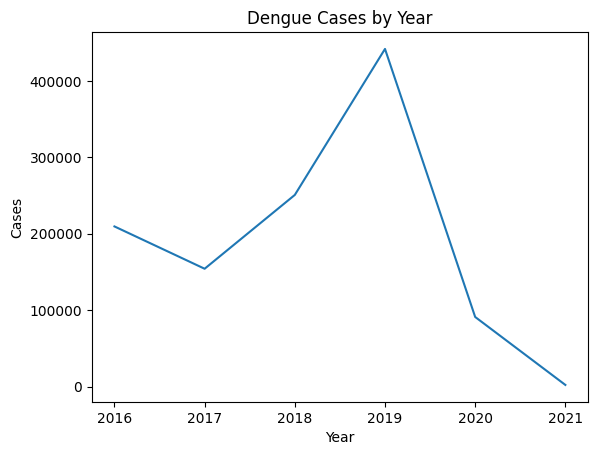

In [ ]:
# Transform 'date' col into year only
year = pd.to_datetime(df['date']).dt.year

# Grouping each instance of cases in a year only counts each row and not actual values (.groupby() method)
# Use the sum() method to get summation of each group
# .reset_index() method to create a df copy of the series after computations
cases_by_year = df.groupby(year)['cases'].sum().reset_index()

print(cases_by_year)

# Create lineplot figure
# For the data argument, use the df copy 'cases' so the computations are applied compared to the original df
fig_cases = sns.lineplot(data=cases_by_year, x='date', y='cases')

plt.ylabel("Cases")
plt.xlabel("Year")
plt.title("Dengue Cases by Year")

plt.show(fig_cases)

According to the line chart, **cases peaked** in the year **2019**, during the COVID-19 outbreak. 

But turns out to be a **misdiagnosis** between COVID-19 and dengue (Khairunisa et al., 2021).

   date  deaths
0  2016    8127
1  2017    4563
2  2018    1226
3  2019    1733
4  2020    1195
5  2021       8


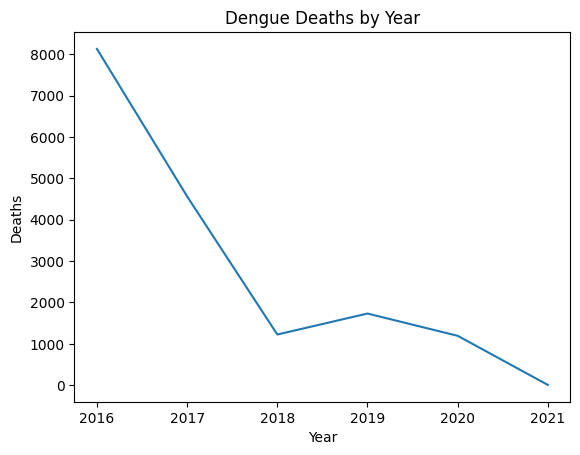

In [88]:
# Create a df copy for total deaths by year
deaths_by_year = df.groupby(year)['deaths'].sum().reset_index()

print(deaths_by_year)

fig_deaths = sns.lineplot(data=deaths_by_year, x='date', y='deaths')

plt.ylabel("Deaths")
plt.xlabel("Year")
plt.title("Dengue Deaths by Year")

plt.show(fig_deaths)

**Deaths peaked** in the year **2016**, during the **Dengvaxia Controversy** as it was discovered that it may lead to more severe symptoms of dengue, with some resulting in death (Santos, 2019).  

There has been a **decline** (2016-2018) in deaths ever since Dengvaxia had been discontinued.


#### Verify drop in count of the year 2021

In [89]:
df.groupby(year).count()

,loc,cases,deaths,date,Region
date,,,,,
2016,6329,6329,6329,6329,6329
2017,6636,6636,6636,6636,6636
2018,6552,6552,6552,6552,6552
2019,6426,6426,6426,6426,6426
2020,6506,6506,6506,6506,6506
2021,252,252,252,252,252


The reason for the drop in both cases and deaths is that there are **insufficient entries** for the year 2021, specifically **only 252** entries.

### Relationship of Cases-Deaths (Scatterplot)

Most Cases: 
       cases  deaths
22822   3382       2 

Most Deaths: 
      deaths  cases
5991     205      0 

Least Cases: 
    cases  deaths
74      0       0
75      0       0 

Least Deaths: 
   deaths  cases
1       0     15
2       0     13


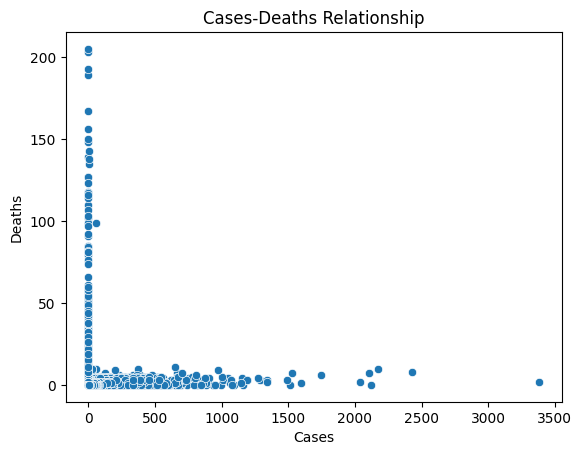

In [ ]:
# Locate the row with the highest and lowest cases and deaths

print('Most Cases: ')
print(df[['cases','deaths']][df['cases'] == df['cases'].max()], '\n')

print('Most Deaths: ')
print(df[['deaths','cases']][df['deaths'] == df['deaths'].max()], '\n')

print('Least Cases: ')
print(df[['cases','deaths']][df['cases'] == df['cases'].min()].head(2), '\n')

print('Least Deaths: ')
print(df[['deaths','cases']][df['deaths'] == df['deaths'].min()].head(2))

fig_casestodeaths = sns.scatterplot(data=df, x='cases', y='deaths')

plt.ylabel("Deaths")
plt.xlabel("Cases")
plt.title("Cases-Deaths Relationship")

plt.show()

The scatterplot figure shows **NO RELATIONSHIP** between the two variables (Deaths, Cases). A higher count of cases doesn't mean more deaths, and vice versa. 

### Correlation of each Features in the Dataset (Heatmap)

Before category encoding: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32701 entries, 1 to 32701
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   loc     32701 non-null  object
 1   cases   32701 non-null  int64 
 2   deaths  32701 non-null  int64 
 3   date    32701 non-null  object
 4   Region  32701 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.2+ MB
None

After category encoding: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32701 entries, 1 to 32701
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   loc     32701 non-null  int8 
 1   cases   32701 non-null  int64
 2   deaths  32701 non-null  int64
 3   year    32701 non-null  int32
 4   Region  32701 non-null  int8 
 5   month   32701 non-null  int32
dtypes: int32(2), int64(2), int8(2)
memory usage: 830.4 KB
None


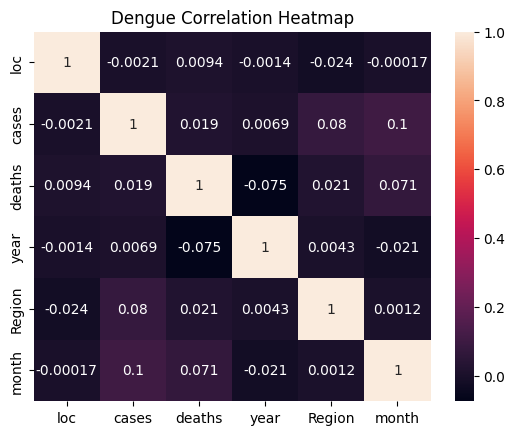

In [99]:
df_copy = df.copy()

print("Before category encoding: ")
print(df_copy.info())

# Ensure 'loc' and 'Region' columns are of 'category' dtype then encode (heatmap only accepts numerical values)
df_copy['loc'] = df['loc'].astype('category').cat.codes
df_copy['Region'] = df['Region'].astype('category').cat.codes

# Separate the 'date' column into 'month' and 'year' columns
df_copy['date'] = pd.to_datetime(df_copy['date']).dt.year
df_copy.rename(columns={'date': 'year'}, inplace=True)

df_copy['month'] = pd.to_datetime(df['date']).dt.month

print("\nAfter category encoding: ")
print(df_copy.info())

# Calculate the correlation matrix
corr_matrix = df_copy.corr()

# Plot the heatmap
fig_corrheatmap = sns.heatmap(corr_matrix, annot=True)

plt.title("Dengue Correlation Heatmap")

plt.show(fig_corrheatmap)

The correlation heatmap provides a visual representation of the relationship of each feature variable in the dataset with most values close to 0, indicating a **weak** or **non-linear relationship** among these features. 

This may suggest that a **non-linear approach** to explore non-linear patterns would be appropriate going further. 

### Total Cases and Deaths by Region (Pie Chart)

                        Region   cases
7       REGION IV-A-CALABARZON  163177
6     REGION III-CENTRAL LUZON  132158
11   REGION VI-WESTERN VISAYAS  117563
3      NATIONAL CAPITAL REGION  116147
12  REGION VII-CENTRAL VISAYAS  110726


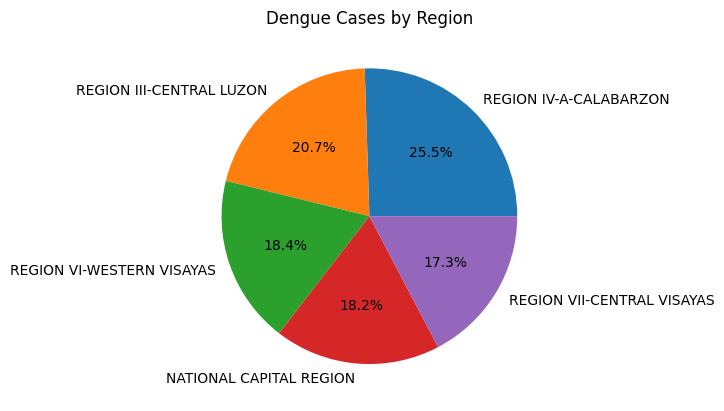

In [92]:
# Group the dataset by 'Region' and sum the total cases
cases_by_region = df.groupby('Region')['cases'].sum().reset_index().sort_values(by='cases',ascending=False)

# Filter the top 5 regions with the highest cases
filtered_top5regioncases = cases_by_region.head(5)
print(filtered_top5regioncases)

plt.pie(filtered_top5regioncases['cases'], labels=filtered_top5regioncases['Region'], autopct='%1.1f%%')
plt.title("Dengue Cases by Region")
plt.show()

Considering that the Philippines is a tropical country, making it **warm and humid**, after experiencing heavy rainfall throughout the year, an ideal breeding ground for mosquitoes (Ogliore, 2024). 

According to PhilAtlas, the top 3 regions in population are CALABARZON, NCR, Central Luzon. Recent studies have proven that **populous areas** along with **poor sanitation**, including inadequate waste disposal and the presence of standing water, significantly contributes to more habitat for mosquitoes and dengue transmission (Agrupis et al., 2019 and Medina et al., 2023)


                        Region  deaths
3      NATIONAL CAPITAL REGION    4009
16     REGION XII-SOCCSKSARGEN    2798
11   REGION VI-WESTERN VISAYAS    1825
12  REGION VII-CENTRAL VISAYAS    1760
1                          CAR    1008


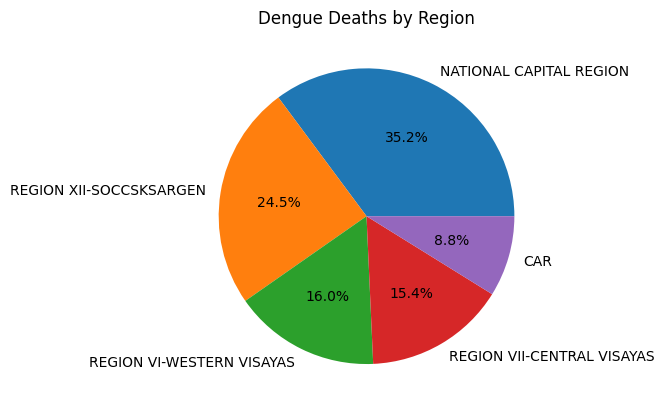

In [93]:
# Group by region and sum the deaths
deaths_by_region = df.groupby('Region')['deaths'].sum().reset_index().sort_values(by='deaths', ascending=False)

fltr_top5regiondeaths = deaths_by_region.head(5)

# Print the grouped data
print(fltr_top5regiondeaths)

# Create a pie chart
plt.pie(fltr_top5regiondeaths['deaths'], labels=fltr_top5regiondeaths['Region'], autopct='%1.1f%%')
plt.title("Dengue Deaths by Region")
plt.show()

Most are located around NCR, Visayas Regions and Central Mindanao. Calabarzon may be the top region with the most cases but isn’t present in the top 5 regions by deaths. 

A recent study by De Vera et al. (2021) identified that poor healthcare infrastructure or even the substandard living conditions contributes to the high incidence and mortality rates of dengue in the Philippines.

### Case-Death Comparison on with Most Cases and Deaths (Stacked Bar Chart)

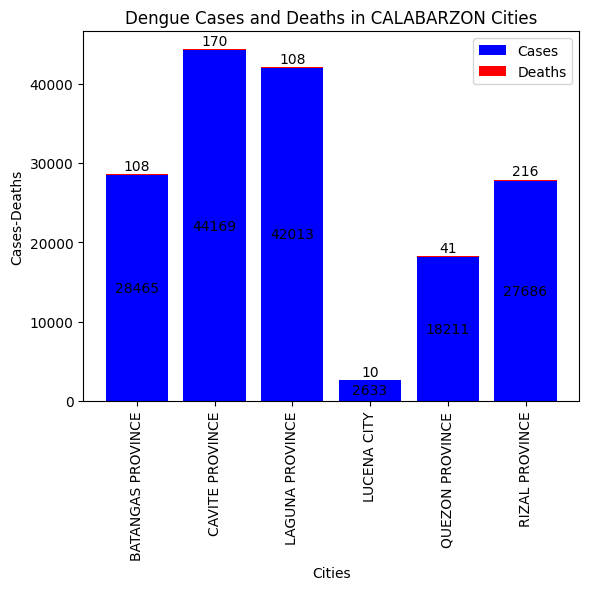

In [94]:
# Get the unique cities in CALABARZON
calabarzon_cities = df[df['Region'] == 'REGION IV-A-CALABARZON']['loc'].unique()

# Sum cases and deaths for each city in CALABARZON
cases_by_city = df[df['Region'] == 'REGION IV-A-CALABARZON'].groupby('loc')['cases'].sum().reindex(calabarzon_cities)
deaths_by_city = df[df['Region'] == 'REGION IV-A-CALABARZON'].groupby('loc')['deaths'].sum().reindex(calabarzon_cities)

# Plot the bar graph
# Create an array of indices for the x-axis of each location
x = np.arange(len(calabarzon_cities))

# Create a bar graph
plt.bar(x=x, height=cases_by_city.values, color='blue', label='Cases')
plt.bar(x=x, height=deaths_by_city.values, color='red', bottom=cases_by_city.values, label='Deaths')

# Add text labels for each bar on its exact value
for i, value in enumerate(cases_by_city.values):
    plt.text(i, value/2, str(value), ha='center', va='center')
    plt.text(i,(value+deaths_by_city.values[i])+500, str(deaths_by_city.values[i]), ha='center')

plt.xlabel('Cities')
plt.ylabel('Cases-Deaths')
plt.title('Dengue Cases and Deaths in CALABARZON Cities')
plt.xticks(ticks=x, labels=calabarzon_cities, rotation=90)
plt.legend()

plt.show()

In the CALABARZON Region, various climate factors such as humidity and temperature, were associated  (Magtibay et al., 2020)

The region was not present in the top 5 regions in deaths due to the region actively spreading awareness (PNA, 2019)

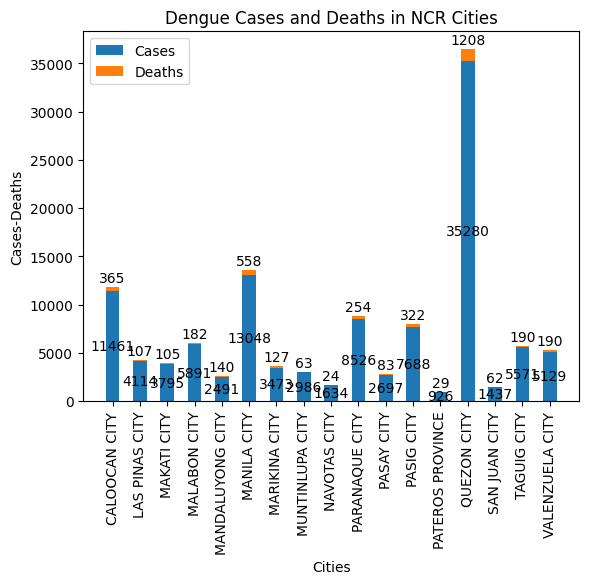

In [95]:
# Get unique cities in NCR
ncr_cites = df[df['Region'] == 'NATIONAL CAPITAL REGION']['loc'].unique()

# Store the sum of cases and deaths in ncr_cities reorganized by each location
ncr_cases_by_city = df[df['Region'] == 'NATIONAL CAPITAL REGION'].groupby('loc')['cases'].sum().reindex(ncr_cites)

ncr_deaths_by_city = df[df['Region'] == 'NATIONAL CAPITAL REGION'].groupby('loc')['deaths'].sum().reindex(ncr_cites)

# Plot the bar graph
x = np.arange(len(ncr_cites))
width = 0.5

# Create the bar graph
plt.bar(x=x, height=ncr_cases_by_city, label='Cases', width=width)
plt.bar(x=x, height=ncr_deaths_by_city, label='Deaths', width=width, bottom=ncr_cases_by_city)

# Add the values on top of the bars
for i, value in enumerate(ncr_cases_by_city):
    plt.text(i, value/2, str(value), ha='center', va='center')
    plt.text(i, (value+ncr_deaths_by_city.values[i])+500, str(ncr_deaths_by_city.values[i]), ha='center')

plt.xlabel('Cities')
plt.ylabel('Cases-Deaths')
plt.title('Dengue Cases and Deaths in NCR Cities')
plt.xticks(ticks=x, labels=ncr_cites, rotation=90)
plt.legend()

plt.show()

According to (GMA, 2019), when it comes to the amount of trash in Quezon City, consider the geographic location of the area and number of squatters. 

The geographic and population factors may have contributed to its death count.

## Conclusion

### More Cases? More Deaths?

There is no direct connection between cases and deaths; the increase in cases does not affect the deaths and vice versa.

### Geographical Factor?

The nature of the country being warm and humid is an ideal breeding ground for mosquitos.

### High Population Count?
More people, more human footprints, more cases